# Basics of MLP
- 가장 기본적인 뉴럴네트워크를 만들어서 간단한 regression/classification 작업을 수행한다

# 1. Import Library

In [1]:
import numpy as np
import matplotlib as mlp
import pandas as pd
import os

import keras

Using TensorFlow backend.


# 2. Load Data

In [2]:
from sklearn.datasets import load_breast_cancer

# sklearn에서 제공하는 유방암 데이터
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
for i, name in enumerate(cancer.feature_names):
    print('%02d : %s' %(i,name)) 
    
print()
for i, name in enumerate(cancer.target_names):
    print('Target %d is %s' %(i, name)) # malignant(악성), benign(양성)

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension

Target 0 is malignant
Target 1 is benign


In [4]:
# Summary

print('The data information summary')
print()
data = cancer.data
target = cancer.target

print('Data  \t\t=>\t', data.shape)
print('Target \t\t=>\t', target.shape)

print()
malignant = data[target==0]
benign = data[target==1]

print('Malignant data \t =>\t',malignant.shape)
print('Benign data \t =>\t',benign.shape)

The data information summary

Data  		=>	 (569, 30)
Target 		=>	 (569,)

Malignant data 	 =>	 (212, 30)
Benign data 	 =>	 (357, 30)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.8)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


# 3. Build the Network

In [7]:
#1. Basic - 1layer
from keras.models import Sequential
from keras.layers import Dense

input_shape = 30

model = Sequential()
model.add(Dense(1, input_shape=(input_shape,), activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.optimizers import SGD
from keras.losses import binary_crossentropy

model.compile(optimizer = SGD(lr = 0.01),
             loss = binary_crossentropy,
             metrics = ['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    validation_split=0.2,
                    epochs = 50)

Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 516us/step - loss: 1496.3805 - accuracy: 0.4670 - val_loss: 1713.6257 - val_accuracy: 0.6593
Epoch 2/50
364/364 [==============================] - 0s 32us/step - loss: 1858.3402 - accuracy: 0.4505 - val_loss: 2386.3155 - val_accuracy: 0.3407
Epoch 3/50
364/364 [==============================] - 0s 36us/step - loss: 1648.1483 - accuracy: 0.4560 - val_loss: 969.5703 - val_accuracy: 0.3407
Epoch 4/50
364/364 [==============================] - 0s 44us/step - loss: 1309.6753 - accuracy: 0.4643 - val_loss: 855.1322 - val_accuracy: 0.6593
Epoch 5/50
364/364 [==============================] - 0s 49us/step - loss: 1074.5710 - accuracy: 0.5275 - val_loss: 1955.8397 - val_accuracy: 0.3407
Epoch 6/50
364/364 [==============================] - 0s 48us/step - loss: 1194.1755 - accuracy: 0.5522 - val_loss: 818.9630 - val_accuracy: 0.6703
Epoch 7/50
364/364 [==============================] - 0s 40us/s

In [10]:
# Visualize the training history
import matplotlib.pyplot as plt

def plot_model(history, title):
    plt.figure(figsize=(10,5))
    ## loss
    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')

    # Accuracy
    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')


    plt.show()

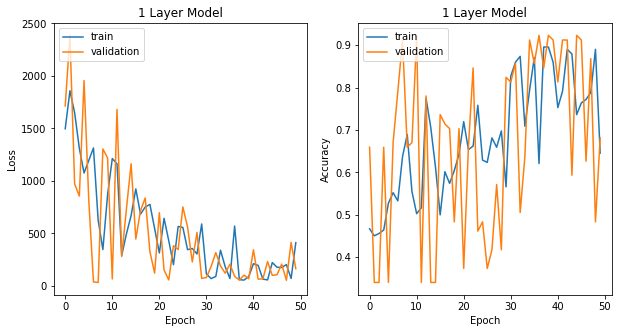

In [11]:
title = '1 Layer Model'
plot_model(history,title)

In [12]:
# evaluate
result = dict()

loss, accuracy = model.evaluate(X_test, y_test)
print("The loss of linear model is \t{:02.5f}".format(loss))
print("The accuracy of linear model is {:02.5f}".format(accuracy*100))

result['1layer-linear'] = [loss, accuracy]

114/114 [==============================] - 0s 39us/step
The loss of linear model is 	121.75699
The accuracy of linear model is 74.56141


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________
Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 491us/step - loss: nan - accuracy: 0.3709 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
364/364 [==============================] - 0s 58us/s

364/364 [==============================] - 0s 86us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


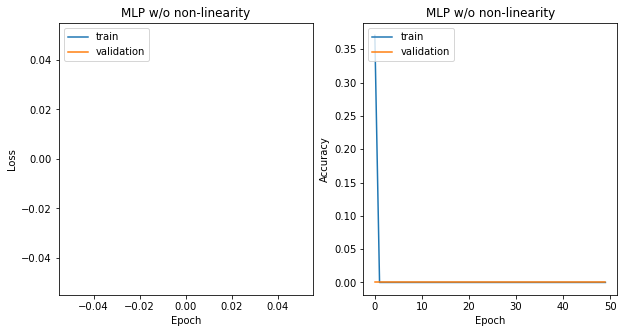

114/114 [==============================] - 0s 49us/step
The loss of MLP w/o non-linearity is 	nan
The accuracy of MLP w/o non-linearity is 0.00000


In [14]:
# Multi layer Perceptron

"""parameter setting"""
input_shape = X_train.shape[1] # 30
hidden1 = 32
hidden2 = 32
hidden3 = 16

"""compile setting"""
learning_rate = 0.01


"""Build the MLP"""
multilayer_model = Sequential()
multilayer_model.add(Dense(hidden1, input_shape=(input_shape,)))
multilayer_model.add(Dense(hidden2))
multilayer_model.add(Dense(hidden3))
multilayer_model.add(Dense(1, activation = 'sigmoid'))

multilayer_model.summary()

"""Model Compile"""
multilayer_model.compile(optimizer = SGD(lr = 0.01),
             loss = binary_crossentropy,
             metrics = ['accuracy'])

"""Training"""
multi_history = multilayer_model.fit(X_train, y_train,
                    batch_size=64,
                    validation_split=0.2,
                    epochs = 50)

title = 'MLP w/o non-linearity'
plot_model(multi_history, title)

# evaluate
loss, accuracy = multilayer_model.evaluate(X_test, y_test)
print("The loss of {} is \t{:02.5f}".format(title, loss))
print("The accuracy of {} is {:02.5f}".format(title, accuracy*100))

result[title] = [loss, accuracy]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________
Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 322us/step - loss: 0.6947 - accuracy: 0.4945 - val_loss: 0.6889 - val_accuracy: 0.6593
Epoch 2/50
364/364 [==============================] - 0s 28us

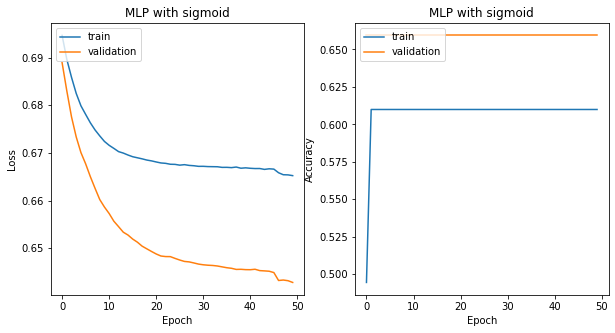

114/114 [==============================] - 0s 50us/step
The loss of MLP with sigmoid is 	0.64379
The accuracy of MLP with sigmoid is 65.78947


In [15]:
# Multi layer Perceptron with Activation(sigmoid)

"""parameter setting"""
input_shape = X_train.shape[1]
hidden1 = 32
hidden2 = 32
hidden3 = 16

"""compile setting"""
learning_rate = 0.01


"""Build the MLP"""
multilayer_model_sigmoid = Sequential()
multilayer_model_sigmoid.add(Dense(hidden1, input_shape=(input_shape,), activation='sigmoid'))
multilayer_model_sigmoid.add(Dense(hidden2, activation='sigmoid'))
multilayer_model_sigmoid.add(Dense(hidden3, activation='sigmoid'))
multilayer_model_sigmoid.add(Dense(1, activation = 'sigmoid'))

multilayer_model_sigmoid.summary()

"""Model Compile"""
multilayer_model_sigmoid.compile(optimizer = SGD(lr = 0.01),
             loss = binary_crossentropy,
             metrics = ['accuracy'])

"""Training"""
multi_sigmoid_history = multilayer_model_sigmoid.fit(X_train, y_train,
                    batch_size=64,
                    validation_split=0.2,
                    epochs = 50)

title = 'MLP with sigmoid'
plot_model(multi_sigmoid_history, title)

# evaluate

loss, accuracy = multilayer_model_sigmoid.evaluate(X_test, y_test)
print("The loss of {} is \t{:02.5f}".format(title, loss))
print("The accuracy of {} is {:02.5f}".format(title, accuracy*100))

result[title] = [loss, accuracy]

# model img 첨부



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________
Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 416us/step - loss: 2812.8286 - accuracy: 0.4973 - val_loss: 0.6923 - val_accuracy: 0.6593
Epoch 2/50
364/364 [==============================] - 0s 4

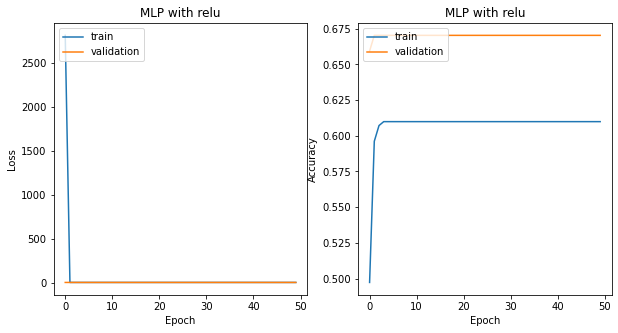

114/114 [==============================] - 0s 61us/step
The loss of MLP with relu is 	0.64578
The accuracy of MLP with relu is 65.78947


In [16]:
# Multi layer Perceptron with Activation(Relu)

"""parameter setting"""
input_shape = X_train.shape[1]
hidden1 = 32
hidden2 = 32
hidden3 = 16

"""compile setting"""
learning_rate = 0.01


"""Build the MLP"""
multilayer_model_relu = Sequential()
multilayer_model_relu.add(Dense(hidden1, input_shape=(input_shape,), activation='relu'))
multilayer_model_relu.add(Dense(hidden2,activation='relu'))
multilayer_model_relu.add(Dense(hidden3, activation='relu'))
multilayer_model_relu.add(Dense(1, activation = 'sigmoid'))

multilayer_model_relu.summary()

"""Model Compile"""
multilayer_model_relu.compile(optimizer = SGD(lr = 0.01),
             loss = binary_crossentropy,
             metrics = ['accuracy'])

"""Training"""
multi_relu_history = multilayer_model_relu.fit(X_train, y_train,
                    batch_size=64,
                    validation_split=0.2,
                    epochs = 50)

title = 'MLP with relu'
plot_model(multi_relu_history, title)

# evaluate
loss, accuracy = multilayer_model_relu.evaluate(X_test, y_test)
print("The loss of {} is \t{:02.5f}".format(title, loss))
print("The accuracy of {} is {:02.5f}".format(title, accuracy*100))

result[title] = [loss, accuracy]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

Epoch 46/50
364/364 [==============================] - 0s 328us/step - loss: 0.4120 - accuracy: 0.8599 - val_loss: 0.3705 - val_accuracy: 0.9341
Epoch 47/50
364/364 [==============================] - 0s 366us/step - loss: 0.4080 - accuracy: 0.8654 - val_loss: 0.3479 - val_accuracy: 0.9231
Epoch 48/50
364/364 [==============================] - 0s 320us/step - loss: 0.4073 - accuracy: 0.8462 - val_loss: 0.5102 - val_accuracy: 0.7143
Epoch 49/50
364/364 [==============================] - 0s 457us/step - loss: 0.3874 - accuracy: 0.8626 - val_loss: 0.4874 - val_accuracy: 0.7363
Epoch 50/50
364/364 [==============================] - 0s 311us/step - loss: 0.5146 - accuracy: 0.7445 - val_loss: 0.3300 - val_accuracy: 0.9231


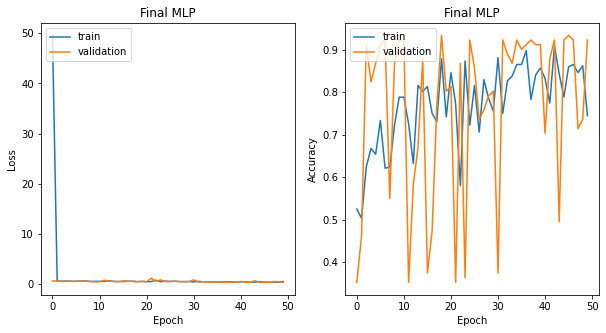

114/114 [==============================] - 0s 115us/step
The loss of Final MLP is 	0.34383
The accuracy of Final MLP is 91.22807


In [18]:
# Multi layer Perceptron with Activation(Relu) + More Deep and wide + Dropout 
from keras.layers import Dropout

"""parameter setting"""
input_shape = X_train.shape[1] # 30
hidden1 = 128 
hidden2 = 256
hidden3 = 512
hidden4 = 256
hidden5 = 128
hidden6 = 64

"""compile setting"""
learning_rate = 0.01
dropout_p = 0.1


"""Build the MLP"""
final_model = Sequential()
final_model.add(Dense(hidden1, input_shape=(input_shape,), activation='relu'))
final_model.add(Dense(hidden2, activation='relu'))
final_model.add(Dropout(dropout_p))

final_model.add(Dense(hidden3, activation='relu'))
final_model.add(Dense(hidden4, activation='relu'))
final_model.add(Dropout(dropout_p))

final_model.add(Dense(hidden5, activation='relu'))
final_model.add(Dense(hidden6, activation='relu'))
final_model.add(Dropout(dropout_p))

final_model.add(Dense(1, activation = 'sigmoid'))

final_model.summary()

"""Model Compile"""
final_model.compile(optimizer = SGD(lr = learning_rate),
             loss = binary_crossentropy,
             metrics = ['accuracy'])

"""Training"""
final_history = final_model.fit(X_train, y_train,
                    batch_size=64,
                    validation_split=0.2,
                    epochs = 50)

title = 'Final MLP'
plot_model(final_history, title)

# evaluate
loss, accuracy = final_model.evaluate(X_test, y_test)
print("The loss of {} is \t{:02.5f}".format(title, loss))
print("The accuracy of {} is {:02.5f}".format(title, accuracy*100))

result[title] = [loss, accuracy]

In [19]:
index = ['loss', 'accuracy']
pd.DataFrame(result, index=index)

,1layer-linear,MLP w/o non-linearity,MLP with sigmoid,MLP with relu,Final MLP
loss,121.756989,NaN,0.643787,0.645775,0.343835
accuracy,0.745614,0.0,0.657895,0.657895,0.912281
